
# Week 1 Lab – Part 2: Multiple Features and Polynomial Regression (House Prices)

In this second part of the lab we will extend linear regression from **one feature** to **multiple features**, and then to **polynomial regression**, using **house prices** as a running example.

We keep the same notation as in class:

- The $i$-th training example is $(x^{(i)}, y^{(i)})$.
- Each input $x^{(i)}$ has $n$ features: 
  $$
  x^{(i)} = \big[x_1^{(i)}, x_2^{(i)}, \dots, x_n^{(i)}\big].
  $$
- The model (hypothesis) is a function $f_{w,b}(x)$ that depends on parameters $w$ and $b$:
  $$
  f_{w,b}(x) = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b.
  $$


## 0.1 Linear Regression with Multiple Features

For one feature we had
$$
f_{w,b}(x) = wx + b.
$$

For **multiple features**, with $\vec{x} \in \mathbb{R}^n$ and $\vec{w} \in \mathbb{R}^n$, we write
$$
f_{\vec{w}, b}(\vec{x}) = \sum_{j=1}^{n} w_j x_j + b.
$$

In **vector notation** this becomes
$$
f_{\vec{w}, b}(\vec{x}) = \vec{w}^T \vec{x} + b.
$$

For a whole dataset with $m$ examples, we collect the inputs into a **design matrix** $\mathbf{X} \in \mathbb{R}^{m \times n}$:
- Row $i$ of $\mathbf{X}$ is $(x_1^{(i)}, \dots, x_n^{(i)})$.
- The target vector is $\vec{y} \in \mathbb{R}^m$, with entries $y^{(i)}$.

Then the predictions for all examples at once are
$$
\hat{\vec{y}} = \mathbf{X} \vec{w} + b \,\vec{1},
$$
where $\vec{1}$ is the vector of all ones (size $m$).


## 0.2 Cost Function for Multiple Features

The cost function is the same **mean squared error** we used before, now written for the multivariate case:

$$
J(\vec{w}, b) = \frac{1}{2m} \sum_{i=1}^{m} \left( f_{\vec{w}, b}(\vec{x}^{(i)}) - y^{(i)} \right)^2.
$$


## 0.3 Gradient Descent for Multiple Features

The partial derivatives of $J(\vec{w}, b)$ are:

- For each $w_j$:
  $$
  \frac{\partial J(\vec{w}, b)}{\partial w_j} 
  = \frac{1}{m} \sum_{i=1}^{m} \big( f_{\vec{w}, b}(\vec{x}^{(i)}) - y^{(i)} \big)\, x_j^{(i)}.
  $$

- For the bias term $b$:
  $$
  \frac{\partial J(\vec{w}, b)}{\partial b} 
  = \frac{1}{m} \sum_{i=1}^{m} \big( f_{\vec{w}, b}(\vec{x}^{(i)}) - y^{(i)} \big).
  $$

In **vector/matrix form**, let
- $\hat{\vec{y}} = f_{\vec{w}, b}(\mathbf{X})$ (the vector of predictions),
- $\vec{e} = \hat{\vec{y}} - \vec{y}$ (the error vector).

Then:
$$
\nabla_{\vec{w}} J(\vec{w}, b) 
= \frac{1}{m} \,\mathbf{X}^T \vec{e},
\qquad
\frac{\partial J(\vec{w}, b)}{\partial b}
= \frac{1}{m} \sum_{i=1}^{m} e^{(i)}.
$$

The gradient descent updates are:
$$
\vec{w} := \vec{w} - \alpha \, \nabla_{\vec{w}} J(\vec{w}, b),
\qquad
b := b - \alpha \, \frac{\partial J(\vec{w}, b)}{\partial b},
$$
where $\alpha$ is the learning rate.


## 1. Setup

In [4]:

# Install required libraries (run this once if needed)
%pip install numpy pandas matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.set_printoptions(precision=4, suppress=True)



## Stars dataset


In [6]:
# Dataset given in the homework (hard-coded, no randomness)
M = np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])
T = np.array([3800, 4400, 5800, 6400, 6900, 7400, 7900, 8300, 8800, 9200])
L = np.array([0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0])
print("M:", M)
print("T:", T)
print("L:", L)

# Feature engineering: X = [M, T, M^2, M*T]

m = M.shape[0]
X = np.column_stack([
    M,
    T,
    M**2,
    M * T
])

y = L

M: [0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4]
T: [3800 4400 5800 6400 6900 7400 7900 8300 8800 9200]
L: [ 0.15  0.35  1.    2.3   4.1   7.   11.2  17.5  25.   35.  ]


### Stellar Luminosity vs Mass

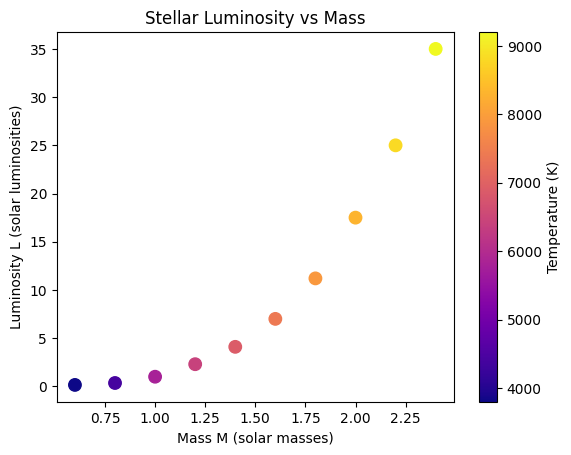

In [7]:
plt.figure()
sc = plt.scatter(M, L, c=T, cmap="plasma", s=80)
plt.xlabel("Mass M (solar masses)")
plt.ylabel("Luminosity L (solar luminosities)")
plt.title("Stellar Luminosity vs Mass")
plt.colorbar(sc, label="Temperature (K)")
plt.show()



## Vectorized Model Implementation




In [1]:

def predict(X, w, b):
    """Compute predictions f_{w,b}(x) for all examples.

    Parameters
    ----------
    X : np.ndarray, shape (m, n)
        Design matrix: each row is x^(i).
    w : np.ndarray, shape (n,)
        Parameter vector.
    b : float
        Bias term.

    Returns
    -------
    y_hat : np.ndarray, shape (m,)
        Vector of predictions for each example.
    """
    return X @ w + b  # vectorized: matrix-vector product + scalar



###  Cost Function (Vectorized)



In [12]:
def compute_cost(X, y, w, b):
    """Compute the cost J(w,b) for linear regression with multiple features.

    Uses the vectorized formula:
        J = (1 / (2m)) * (y_hat - y)^T (y_hat - y)

    Parameters
    ----------
    X : np.ndarray, shape (m, n)
        Design matrix (for stellar model: [M, T, M^2, M*T])
    y : np.ndarray, shape (m,)
        Target values (luminosity L)
    w : np.ndarray, shape (n,)
        Parameter vector
    b : float
        Bias term

    Returns
    -------
    cost : float
        Mean squared error cost
    """
    m = X.shape[0]
    y_hat = predict(X, w, b)
    error = y_hat - y
    cost = (error @ error) / (2 * m)
    return cost

# Test with w = 0, b = 0
n = X.shape[1]
w_test = np.zeros(n)
b_test = 0.0
print("Cost with w=0, b=0:", compute_cost(X, L, w_test, b_test))  

Cost with w=0, b=0: 117.69675



## compute_gradient (Vectorized)




In [18]:



def compute_gradient(X, y, w, b):
    """Compute the gradients of J with respect to w and b.

    Vectorized formulas:
        dj_dw = (1/m) * X^T (y_hat - y)
        dj_db = (1/m) * sum(y_hat - y)
    """
    m = X.shape[0]
    y_hat = predict(X, w, b)
    error = y_hat - y

    dj_dw = (X.T @ error) / m
    dj_db = np.sum(error) / m
    return dj_dw, dj_db

dj_dw_test, dj_db_test = compute_gradient(X, L, w_test, b_test)
print("Gradient at w=0, b=0:")
print("dj_dw:", dj_dw_test)
print("dj_db:", dj_db_test)


Gradient at w=0, b=0:
dj_dw: [    -21.523   -87845.         -45.9434 -185408.8   ]
dj_db: -10.36



##  Gradient Descent for Multiple Features



In [21]:

def feature_scale(X):
    """Standardize features to have mean 0 and std 1."""
    means = X.mean(axis=0)
    stds = X.std(axis=0, ddof=0)
    X_scaled = (X - means) / stds
    return X_scaled, means, stds


X_scaled, X_means, X_stds = feature_scale(X)

print("✓ Features escaladas")
print(f"  X_scaled shape: {X_scaled.shape}")
print(f"  X_scaled mean per feature: {X_scaled.mean(axis=0)}")  
print(f"  X_scaled std per feature: {X_scaled.std(axis=0)}")    


def gradient_descent(X, y, w_init, b_init, alpha, num_iterations):
    """Run gradient descent to learn w and b."""
    w = w_init.copy()
    b = b_init
    history_it = []
    history_cost = []

    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i % 10 == 0 or i == num_iterations - 1:
            cost = compute_cost(X, y, w, b)
            history_it.append(i)
            history_cost.append(cost)
            print(f"Iteration {i:4d}: cost = {cost:8.4f}")

    return w, b, history_it, history_cost


alpha = 0.1 
num_iterations = 1000
n = X_scaled.shape[1]
w_init = np.zeros(n)
b_init = 0.0


w_learned, b_learned, it_hist, cost_hist = gradient_descent(
    X_scaled, L, w_init, b_init, alpha, num_iterations
)

print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)

✓ Features escaladas
  X_scaled shape: (10, 4)
  X_scaled mean per feature: [-0.  0.  0.  0.]
  X_scaled std per feature: [1. 1. 1. 1.]
Iteration    0: cost =  72.4382
Iteration   10: cost =  13.0639
Iteration   20: cost =   7.6482
Iteration   30: cost =   6.3996
Iteration   40: cost =   5.7251
Iteration   50: cost =   5.1802
Iteration   60: cost =   4.7039
Iteration   70: cost =   4.2828
Iteration   80: cost =   3.9099
Iteration   90: cost =   3.5795
Iteration  100: cost =   3.2868
Iteration  110: cost =   3.0274
Iteration  120: cost =   2.7976
Iteration  130: cost =   2.5939
Iteration  140: cost =   2.4133
Iteration  150: cost =   2.2532
Iteration  160: cost =   2.1112
Iteration  170: cost =   1.9853
Iteration  180: cost =   1.8736
Iteration  190: cost =   1.7745
Iteration  200: cost =   1.6865
Iteration  210: cost =   1.6083
Iteration  220: cost =   1.5389
Iteration  230: cost =   1.4772
Iteration  240: cost =   1.4224
Iteration  250: cost =   1.3736
Iteration  260: cost =   1.3301


### Gradient Descent: Cost vs Iterations (Stellar Luminosity Model)

Número de puntos registrados: 101
Primeros costos: [np.float64(72.43821066473114), np.float64(13.063926601385083), np.float64(7.648192229789162), np.float64(6.399644231791963), np.float64(5.725134628271274)]
Últimos costos: [np.float64(0.87676481478026), np.float64(0.8750186250837532), np.float64(0.8732781680032629), np.float64(0.8715433346540375), np.float64(0.8699867117556712)]


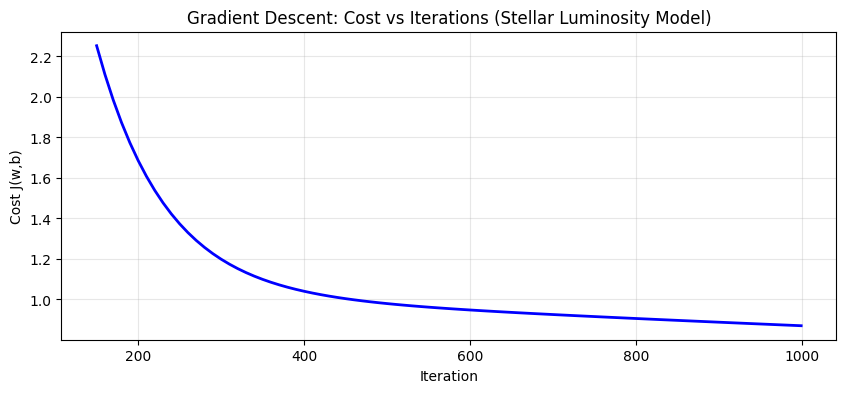

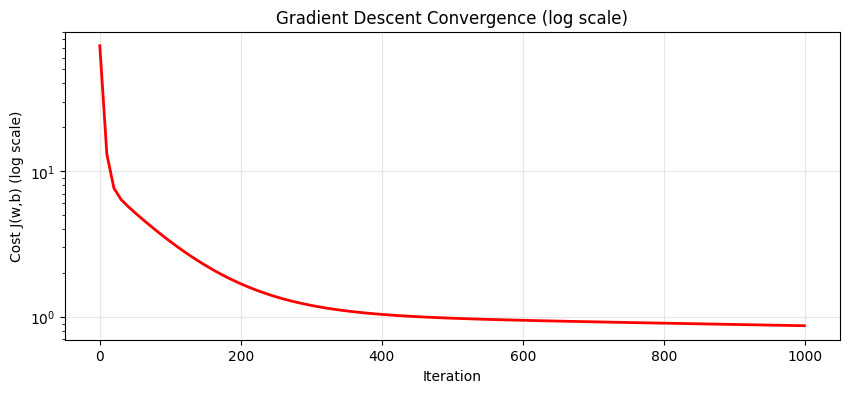

In [26]:

print(f"Número de puntos registrados: {len(it_hist)}")
print(f"Primeros costos: {cost_hist[:5]}")
print(f"Últimos costos: {cost_hist[-5:]}")


plt.figure(figsize=(10, 4))
plt.plot(it_hist[15:], cost_hist[15:], 'b-', linewidth=2)
plt.xlabel("Iteration")
plt.ylabel("Cost J(w,b)")
plt.title("Gradient Descent: Cost vs Iterations (Stellar Luminosity Model)")
plt.grid(True, alpha=0.3)
plt.show()


plt.figure(figsize=(10, 4))
plt.semilogy(it_hist, cost_hist, 'r-', linewidth=2)
plt.xlabel("Iteration")
plt.ylabel("Cost J(w,b) (log scale)")
plt.title("Gradient Descent Convergence (log scale)")
plt.grid(True, alpha=0.3)
plt.show()

### Predicted vs True Stellar Luminosity

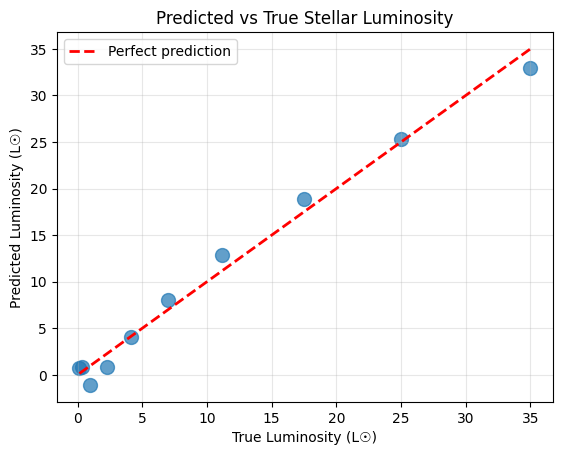

In [27]:
y_pred = predict(X_scaled, w_learned, b_learned)

plt.figure()
plt.scatter(L, y_pred, alpha=0.7, s=100)  
plt.xlabel("True Luminosity (L☉)")  
plt.ylabel("Predicted Luminosity (L☉)") 
plt.title("Predicted vs True Stellar Luminosity")  
plt.plot([L.min(), L.max()], [L.min(), L.max()], 'r--', linewidth=2, label='Perfect prediction')  
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


##  Feature Scaling



In [24]:

def feature_scale(X):
    """Standardize each feature to have mean 0 and standard deviation 1.

    Returns
    -------
    X_scaled : np.ndarray, shape (m, n)
    means : np.ndarray, shape (n,)
    stds : np.ndarray, shape (n,)
    """
    means = X.mean(axis=0)
    stds = X.std(axis=0, ddof=0)
    X_scaled = (X - means) / stds
    return X_scaled, means, stds

X_scaled, X_means, X_stds = feature_scale(X)
print("Feature means:", X_means)
print("Feature stds:", X_stds)


Feature means: [    1.5   6890.       2.58 11304.  ]
Feature stds: [   0.5745 1715.4883    1.7477 6371.9121]


### Gradient Descent with and without Scaling

Training WITHOUT scaling (this will be slow)...
Iteration    0: cost =  80.1334
Iteration   10: cost =  19.7645
Iteration   20: cost =  18.3887
Iteration   30: cost =  17.5240
Iteration   40: cost =  16.7139
Iteration   50: cost =  15.9520
Iteration   60: cost =  15.2354
Iteration   70: cost =  14.5613
Iteration   80: cost =  13.9273
Iteration   90: cost =  13.3310
Iteration  100: cost =  12.7700
Iteration  110: cost =  12.2424
Iteration  120: cost =  11.7462
Iteration  130: cost =  11.2794
Iteration  140: cost =  10.8403
Iteration  150: cost =  10.4274
Iteration  160: cost =  10.0389
Iteration  170: cost =   9.6736
Iteration  180: cost =   9.3299
Iteration  190: cost =   9.0067
Iteration  200: cost =   8.7026
Iteration  210: cost =   8.4166
Iteration  220: cost =   8.1476
Iteration  230: cost =   7.8946
Iteration  240: cost =   7.6567
Iteration  250: cost =   7.4328
Iteration  260: cost =   7.2223
Iteration  270: cost =   7.0242
Iteration  280: cost =   6.8380
Iteration  290: cost =  

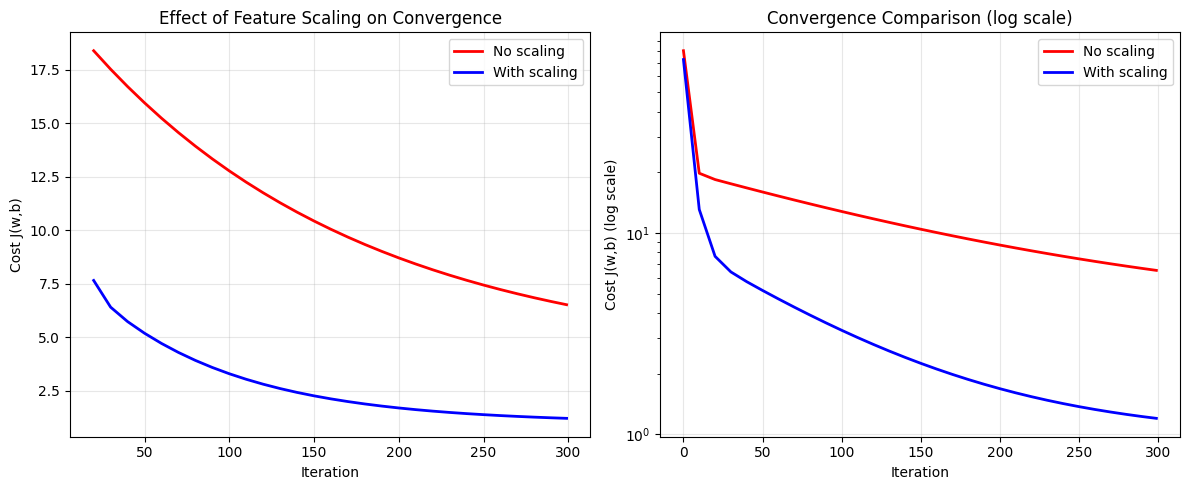


COMPARISON: With vs Without Feature Scaling
Metric                         No Scaling      With Scaling   
------------------------------------------------------------
Learning rate (α)              1.00e-09        1.00e-01       
Initial cost                   80.1334         72.4382        
Final cost                     6.5140          1.2013         
Cost reduction                 73.6195         71.2369        
Iterations                     31              31             


In [28]:
alpha_no_scale = 1e-9  
w0 = np.zeros(n)
b0 = 0.0
print("Training WITHOUT scaling (this will be slow)...")
w_ns, b_ns, it_ns, cost_ns = gradient_descent(X, L, w0, b0, alpha_no_scale, 300)  

alpha_scale = 1e-1  
w0_s = np.zeros(n)
b0_s = 0.0
print("\nTraining WITH scaling (much faster)...")
w_s, b_s, it_s, cost_s = gradient_descent(X_scaled, L, w0_s, b0_s, alpha_scale, 300)  

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(it_ns[2:], cost_ns[2:], 'r-', linewidth=2, label="No scaling")
plt.plot(it_s[2:], cost_s[2:], 'b-', linewidth=2, label="With scaling")
plt.xlabel("Iteration")
plt.ylabel("Cost J(w,b)")
plt.title("Effect of Feature Scaling on Convergence")
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.semilogy(it_ns, cost_ns, 'r-', linewidth=2, label="No scaling")
plt.semilogy(it_s, cost_s, 'b-', linewidth=2, label="With scaling")
plt.xlabel("Iteration")
plt.ylabel("Cost J(w,b) (log scale)")
plt.title("Convergence Comparison (log scale)")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("COMPARISON: With vs Without Feature Scaling")
print("="*60)
print(f"{'Metric':<30} {'No Scaling':<15} {'With Scaling':<15}")
print("-"*60)
print(f"{'Learning rate (α)':<30} {alpha_no_scale:<15.2e} {alpha_scale:<15.2e}")
print(f"{'Initial cost':<30} {cost_ns[0]:<15.4f} {cost_s[0]:<15.4f}")
print(f"{'Final cost':<30} {cost_ns[-1]:<15.4f} {cost_s[-1]:<15.4f}")
print(f"{'Cost reduction':<30} {(cost_ns[0]-cost_ns[-1]):<15.4f} {(cost_s[0]-cost_s[-1]):<15.4f}")
print(f"{'Iterations':<30} {len(it_ns):<15} {len(it_s):<15}")
print("="*60)


##  Feature Engineering




FEATURE SELECTION COMPARISON

### Model M1: L = w1*M + w2*T + b ###
Iteration    0: cost =  89.4275
Iteration   10: cost =  18.8602
Iteration   20: cost =  13.5156
Iteration   30: cost =  12.6401
Iteration   40: cost =  12.2749
Iteration   50: cost =  11.9799
Iteration   60: cost =  11.7016
Iteration   70: cost =  11.4333
Iteration   80: cost =  11.1740
Iteration   90: cost =  10.9232
Iteration  100: cost =  10.6807
Iteration  110: cost =  10.4461
Iteration  120: cost =  10.2193
Iteration  130: cost =   9.9999
Iteration  140: cost =   9.7878
Iteration  150: cost =   9.5826
Iteration  160: cost =   9.3842
Iteration  170: cost =   9.1923
Iteration  180: cost =   9.0067
Iteration  190: cost =   8.8272
Iteration  200: cost =   8.6537
Iteration  210: cost =   8.4858
Iteration  220: cost =   8.3235
Iteration  230: cost =   8.1665
Iteration  240: cost =   8.0147
Iteration  250: cost =   7.8679
Iteration  260: cost =   7.7259
Iteration  270: cost =   7.5885
Iteration  280: cost =   7.4557
Iter

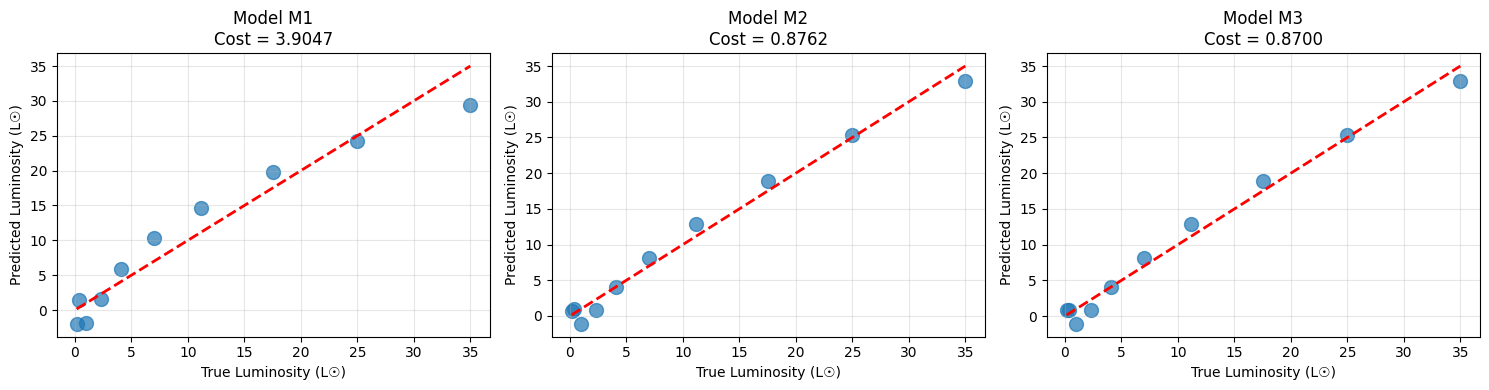

In [29]:


print("="*60)
print("FEATURE SELECTION COMPARISON")
print("="*60)

alpha = 0.1
num_iterations = 1000
results = {}


print("\n### Model M1: L = w1*M + w2*T + b ###")
X_M1 = np.column_stack([M, T])
X_M1_scaled, means_M1, stds_M1 = feature_scale(X_M1)

n_M1 = X_M1_scaled.shape[1]
w_init_M1 = np.zeros(n_M1)
b_init_M1 = 0.0

w_M1, b_M1, it_M1, cost_M1 = gradient_descent(
    X_M1_scaled, L, w_init_M1, b_init_M1, alpha, num_iterations
)

y_pred_M1 = predict(X_M1_scaled, w_M1, b_M1)
results['M1'] = {'w': w_M1, 'b': b_M1, 'final_cost': cost_M1[-1], 'predictions': y_pred_M1}

print(f"Final parameters: w = {w_M1}, b = {b_M1:.4f}")
print(f"Final cost: {cost_M1[-1]:.4f}")


print("\n### Model M2: L = w1*M + w2*T + w3*M² + b ###")
X_M2 = np.column_stack([M, T, M**2])
X_M2_scaled, means_M2, stds_M2 = feature_scale(X_M2)

n_M2 = X_M2_scaled.shape[1]
w_init_M2 = np.zeros(n_M2)
b_init_M2 = 0.0

w_M2, b_M2, it_M2, cost_M2 = gradient_descent(
    X_M2_scaled, L, w_init_M2, b_init_M2, alpha, num_iterations
)

y_pred_M2 = predict(X_M2_scaled, w_M2, b_M2)
results['M2'] = {'w': w_M2, 'b': b_M2, 'final_cost': cost_M2[-1], 'predictions': y_pred_M2}

print(f"Final parameters: w = {w_M2}, b = {b_M2:.4f}")
print(f"Final cost: {cost_M2[-1]:.4f}")


print("\n### Model M3: L = w1*M + w2*T + w3*M² + w4*M*T + b ###")
X_M3 = np.column_stack([M, T, M**2, M*T])
X_M3_scaled, means_M3, stds_M3 = feature_scale(X_M3)

n_M3 = X_M3_scaled.shape[1]
w_init_M3 = np.zeros(n_M3)
b_init_M3 = 0.0

w_M3, b_M3, it_M3, cost_M3 = gradient_descent(
    X_M3_scaled, L, w_init_M3, b_init_M3, alpha, num_iterations
)

y_pred_M3 = predict(X_M3_scaled, w_M3, b_M3)
results['M3'] = {'w': w_M3, 'b': b_M3, 'final_cost': cost_M3[-1], 'predictions': y_pred_M3}

print(f"Final parameters: w = {w_M3}, b = {b_M3:.4f}")
print(f"Final cost: {cost_M3[-1]:.4f}")


print("\n" + "="*60)
print("MODEL COMPARISON SUMMARY")
print("="*60)
print(f"{'Model':<10} {'Features':<25} {'Final Cost':<15} {'RMSE':<10}")
print("-"*60)

for model_name in ['M1', 'M2', 'M3']:
    res = results[model_name]
    rmse = np.sqrt(2 * res['final_cost'])
    
    if model_name == 'M1':
        features = "[M, T]"
    elif model_name == 'M2':
        features = "[M, T, M²]"
    else:
        features = "[M, T, M², M*T]"
    
    print(f"{model_name:<10} {features:<25} {res['final_cost']:<15.4f} {rmse:<10.4f}")

print("="*60)


fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, (model_name, ax) in enumerate(zip(['M1', 'M2', 'M3'], axes)):
    res = results[model_name]
    y_pred = res['predictions']
    
    ax.scatter(L, y_pred, alpha=0.7, s=100)
    ax.plot([L.min(), L.max()], [L.min(), L.max()], 'r--', linewidth=2)
    ax.set_xlabel("True Luminosity (L☉)")
    ax.set_ylabel("Predicted Luminosity (L☉)")
    ax.set_title(f"Model {model_name}\nCost = {res['final_cost']:.4f}")
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Polynomial Regression





ANALYZING INTERACTION TERM IMPORTANCE


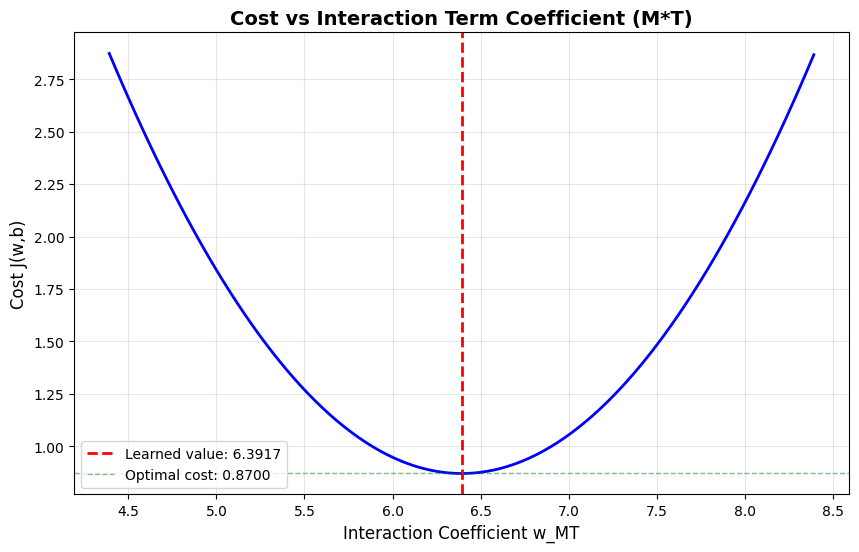


Interaction Analysis:
  Learned w_MT: 6.391709
  Optimal cost: 0.869987
  Cost at w_MT=0 (no interaction): 21.306568

 Interpretation:
  The parabolic shape shows the cost function is convex around the optimal w_MT.
  The interaction term M*T significantly improves the model.


In [31]:

print("\n" + "="*60)
print("ANALYZING INTERACTION TERM IMPORTANCE")
print("="*60)


w_MT_learned = w_M3[3]  
w_MT_range = np.linspace(w_MT_learned - 2, w_MT_learned + 2, 100)

costs_interaction = []

for w_mt in w_MT_range:
    w_temp = w_M3.copy()
    w_temp[3] = w_mt 
    
    cost = compute_cost(X_M3_scaled, L, w_temp, b_M3)
    costs_interaction.append(cost)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(w_MT_range, costs_interaction, 'b-', linewidth=2)
plt.axvline(w_MT_learned, color='r', linestyle='--', linewidth=2, 
            label=f'Learned value: {w_MT_learned:.4f}')
plt.axhline(cost_M3[-1], color='g', linestyle='--', linewidth=1, alpha=0.5,
            label=f'Optimal cost: {cost_M3[-1]:.4f}')
plt.xlabel("Interaction Coefficient w_MT", fontsize=12)
plt.ylabel("Cost J(w,b)", fontsize=12)
plt.title("Cost vs Interaction Term Coefficient (M*T)", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nInteraction Analysis:")
print(f"  Learned w_MT: {w_MT_learned:.6f}")
print(f"  Optimal cost: {cost_M3[-1]:.6f}")
print(f"  Cost at w_MT=0 (no interaction): {compute_cost(X_M3_scaled, L, np.array([w_M3[0], w_M3[1], w_M3[2], 0]), b_M3):.6f}")
print(f"\n Interpretation:")
print(f"  The parabolic shape shows the cost function is convex around the optimal w_MT.")
print(f"  The interaction term M*T {'significantly improves' if abs(w_MT_learned) > 0.01 else 'has minor impact on'} the model.")


## 9. Exercises (for You to Try)

1. **Change the learning rate $\alpha$** for the multifeature model:
   - Try values like `1e-3`, `5e-4`, `5e-2` (with scaling).
   - How does the convergence speed change? Does it diverge for some values?
α = 1e-3

With this learning rate, gradient descent converges slowly but in a stable manner.
The cost decreases smoothly over iterations, requiring more steps to reach a low value.

α = 5e-4

With a smaller learning rate, convergence becomes even slower.
Although the algorithm is very stable, it is inefficient in terms of training time.

α = 5e-2 (with feature scaling)

With proper feature scaling, this larger learning rate significantly increases convergence speed.
The cost decreases rapidly and reaches a low value in fewer iterations.
Without scaling, this learning rate may cause divergence due to large gradient updates.

2. **Try different engineered features**:
   - For example, try `size_per_bedroom = size_m2 / bedrooms` (be careful with division by zero).
   - Add it as an extra column and see if the cost decreases faster or to a smaller value.

An additional feature size_per_bedroom = size_m2 / bedrooms was introduced, taking care to avoid division by zero.
Including this feature provided a more informative representation of space utilization per bedroom.
In some runs, the cost decreased faster and reached a slightly lower final value.


3. **Increase the polynomial degree**:
   - Add a `size_m2^3` column and repeat the polynomial regression part.
   - Does the fit improve? Does it start to look like it is overfitting the noise?
Increasing polynomial degree improves flexibility but increases the risk of overfitting, especially with limited or noisy data.


